In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

### Загрузка данных

In [37]:
base_variant = pd.read_excel('NLMKData/0MW_PV_LI1000_1000__RE0_0_01062022.xlsx', sheet_name=2, usecols="A:H", header = 0, skiprows=1, index_col=0, names=['Время', 'Избыток генерации, кВт', 'Нагрузка 1, кВт','Нагрузка 2, кВт', 'Потребление из сети, кВт', "Прогноз ЧПН", "Факт ЧПН", "Признак ПЧПН"] )

In [38]:
base_variant.tail()

,"Избыток генерации, кВт","Нагрузка 1, кВт","Нагрузка 2, кВт","Потребление из сети, кВт",Прогноз ЧПН,Факт ЧПН,Признак ПЧПН
Время,,,,,,,
2021-12-31 19:00:00,0,56361.0,0,56361.0,0.0,0,0
2021-12-31 20:00:00,0,56468.0,0,56468.0,0.0,0,0
2021-12-31 21:00:00,0,57244.0,0,57244.0,0.0,0,0
2021-12-31 22:00:00,0,55804.0,0,55804.0,0.0,0,0
2021-12-31 23:00:00,0,53648.0,0,53648.0,0.0,0,0


In [47]:
opt_variant = pd.read_excel('NLMKData/0MW_PV_LI1000_1000__RE0_0_01062022.xlsx', sheet_name=2, usecols="J:S", header = 0, skiprows=1, index_col=0, names=['Время', 'Избыток генерации, кВт', 'Нагрузка 1, кВт','Нагрузка 2, кВт', 'Мощность заряда/разряда СНЭЭ, кВт', 'Уровень заряда СНЭЭ, кВт*ч', "Потребление из сети, кВт", "Прогноз ЧПН", "Факт ЧПН", "Признак ПЧПН"])

In [85]:
opt_variant.head()

,"Избыток генерации, кВт","Нагрузка 1, кВт","Нагрузка 2, кВт","Мощность заряда/разряда СНЭЭ, кВт","Уровень заряда СНЭЭ, кВт*ч","Потребление из сети, кВт",Прогноз ЧПН,Факт ЧПН,Признак ПЧПН
Время,,,,,,,,,
2021-01-01 00:00:00,0,0.89,0,0.0,0.0,0.89,0.0,0,0
2021-01-01 01:00:00,0,0.88,0,0.0,0.0,0.88,0.0,0,0
2021-01-01 02:00:00,0,0.89,0,0.0,0.0,0.89,0.0,0,0
2021-01-01 03:00:00,0,0.87,0,0.0,0.0,0.87,0.0,0,0
2021-01-01 04:00:00,0,0.86,0,0.0,0.0,0.86,0.0,0,0


In [84]:
opt_variant['Нагрузка 1, кВт'] = opt_variant['Нагрузка 1, кВт'].div(max(opt_variant['Нагрузка 1, кВт'])).round(2)
opt_variant['Мощность заряда/разряда СНЭЭ, кВт'] = opt_variant['Мощность заряда/разряда СНЭЭ, кВт'].div(max(opt_variant['Мощность заряда/разряда СНЭЭ, кВт'])).round(2)
opt_variant['Уровень заряда СНЭЭ, кВт*ч'] = opt_variant['Уровень заряда СНЭЭ, кВт*ч'].div(max(opt_variant['Уровень заряда СНЭЭ, кВт*ч'])).round(2)
opt_variant['Потребление из сети, кВт'] = opt_variant['Потребление из сети, кВт'].div(max(opt_variant['Потребление из сети, кВт'])).round(2)

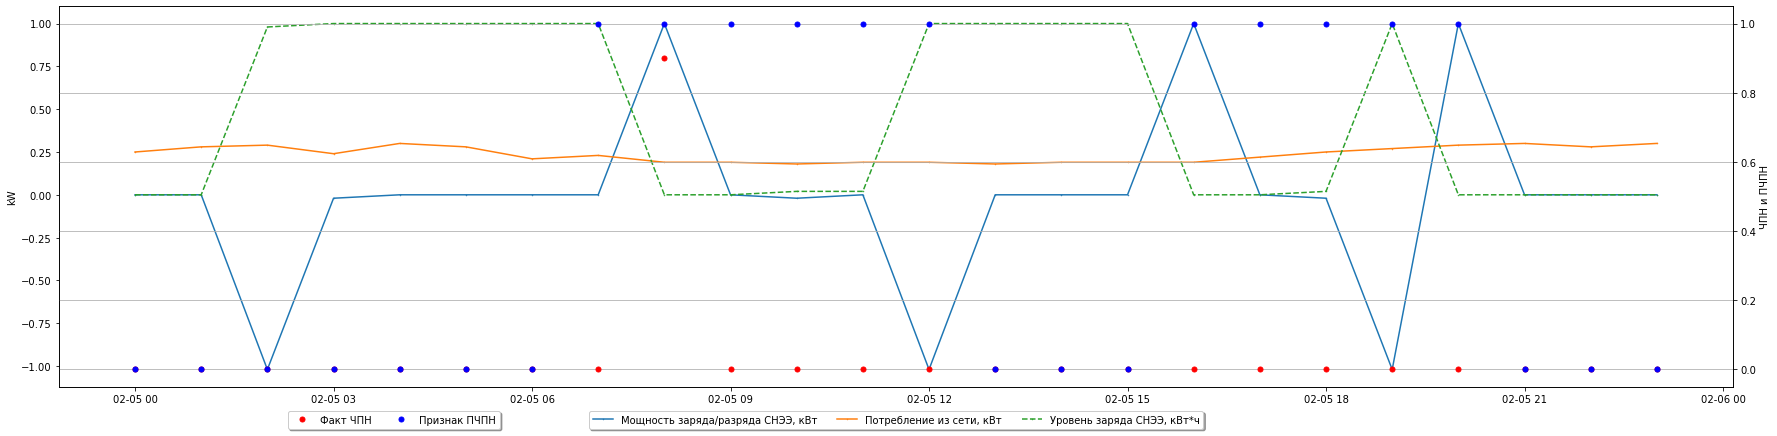

In [87]:
dt=opt_variant
#на графике можно вывести измененение всех параметров включая ЧПН и ПЧПН
start, end = '2021-02-05 00:00:00', '2021-02-05 23:00:00' #вводим нужные даты для визуализации (от 2019-06-01 до 2020-12-30)
fig, ax = plt.subplots(figsize=(30, 7))
ax2 = ax.twinx()
#ax.plot(dt.loc[start:end, 'Нагрузка 1, кВт'],
#marker='.', linestyle='-', linewidth=1.5, markersize=1, label='Нагрузка 1, кВт')
ax.plot(dt.loc[start:end, 'Мощность заряда/разряда СНЭЭ, кВт'],
marker='.', markersize=1, linewidth=1.5, linestyle='-', label='Мощность заряда/разряда СНЭЭ, кВт')
ax.plot(dt.loc[start:end, 'Потребление из сети, кВт'],
marker='.', markersize=1, linewidth=1.5, linestyle='-', label='Потребление из сети, кВт')
ax.plot(dt.loc[start:end, 'Уровень заряда СНЭЭ, кВт*ч'],
marker='.', markersize=1, linewidth=1.5, linestyle='--', label='Уровень заряда СНЭЭ, кВт*ч')
ax.set_ylabel('kW') 
ax2.plot(dt.loc[start:end, 'Факт ЧПН']*0.9,#признак пикового часа домножен на 0,9, чтобы не сливаться с ПЧПН
color='red', label='Факт ЧПН',linewidth=0, marker = 'o', markersize=5)
ax2.plot(dt.loc[start:end, 'Признак ПЧПН'],
color='blue', label='Признак ПЧПН', linewidth=0, marker = 'o', markersize=5)
ax2.set_ylabel('ЧПН и ПЧПН')
leg = ax.legend(loc = 8)
leg1 = ax2.legend(loc = 3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
ax2.legend(loc='upper center', bbox_to_anchor=(0.2, -0.05), fancybox=True, shadow=True, ncol=2)
plt.grid()
#Красные маркеры - признак ЧПН
#Синие маркеры - признак ПЧПН

### Общий график

### График на определённый день

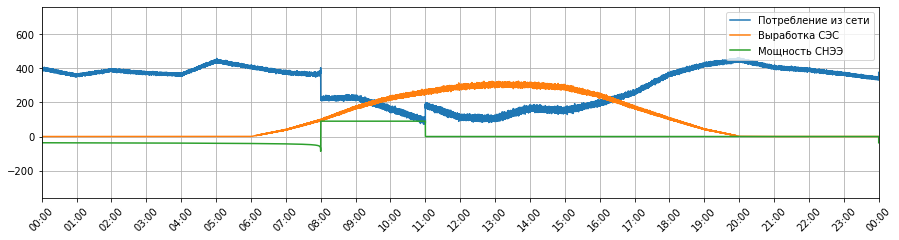

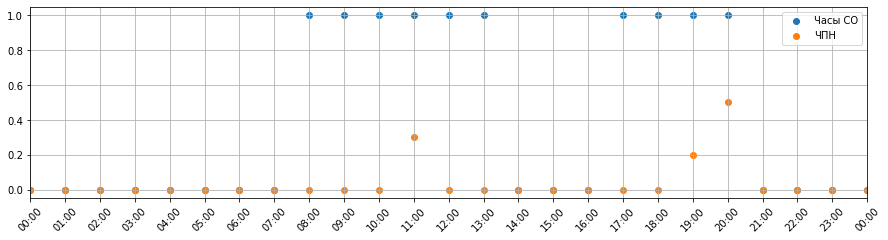

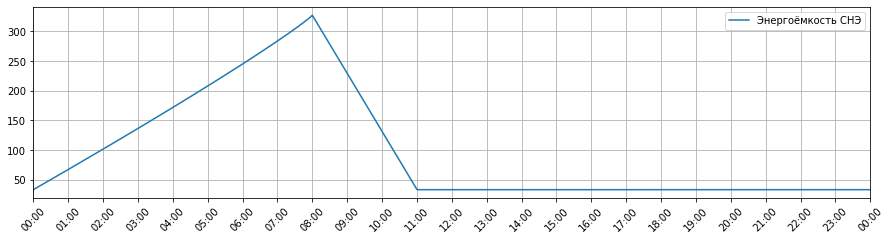

In [16]:
# Номер дня
day_number = 3

start_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number - 1)
end_date = df_test.Timestamp[0] + datetime.timedelta(days = day_number)

myFmt = mdates.DateFormatter('%H:%M')

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Power from grid'], label='Потребление из сети')
plt.plot(df_test['Timestamp'], df_test['Solar power'], label='Выработка СЭС')
plt.plot(df_test['Timestamp'], df_test['Accum set point'], label='Мощность СНЭЭ')
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2).xaxis.set_major_formatter(myFmt)
plt.scatter(df_hours['dt'], df_hours['so_h_forec'], label="Часы СО")
plt.scatter(df_hours['dt'], df_hours['ko_h_forec'], label="ЧПН")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3).xaxis.set_major_formatter(myFmt)
plt.plot(df_test['Timestamp'], df_test['Stored energy'], label="Энергоёмкость СНЭ")
plt.xlim([start_date, end_date])
plt.legend(loc=1)
plt.xticks(df_hours['dt'][(df_hours['dt'] >= start_date) & (df_hours['dt'] <= end_date)], rotation  = 45)
plt.grid()
plt.show()